In [3]:
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import os
import sys
import random
import copy
import math
from six.moves.urllib.request import urlretrieve

# Data loading params
data_root = ''
root_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/'
iris_addr = 'iris/iris.data'
wine_addr = 'wine/wine.data'


glass_addr = 'glass/glass.data'
blood_addr = '00340/data'
spectf_train = 'spect/SPECTF.train'
spectf_test = 'spect/SPECTF.test'
last_percent_reported = None # needed for showing progress in download

In [7]:
def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 5% change in download progress."""
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)
    
    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()
        last_percent_reported = percent
        
def read_df(filename, expected_bytes=None, force=False):
    """Download a file if not present, and make sure it's the right size."""
    dest_filename = os.path.join(data_root, filename)
    dir = dest_filename[:dest_filename.rfind('/')]
    if not os.path.exists(dir):
        os.makedirs(dir)
    if force or not os.path.exists(dest_filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(root_url + filename, dest_filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')        
    return np.array(pd.read_csv(filename, header=None))

# read_df(spectf_test)
# iris_addr = 'iris/iris.data'
# wine_addr = 'wine/wine.data'
# glass_addr = 'glass/glass.data'
# spectf_train = 'spect/SPECTF.train'
# spectf_test = 'spect/SPECTF.train'

In [8]:
def sda(num,clusterMembersNum=100) :
    "This function will generate random datasets : sda1,sda2,sda3"
    seed = 0
    np.random.seed(seed)
    dataset = None
    if num == 1 :
        "generating sda1 according to its table in essay"
        dataset = np.concatenate([np.random.uniform(0,20,(clusterMembersNum,2)),
        np.random.uniform(40,60,(clusterMembersNum,2)),
        np.random.uniform(80,100,(clusterMembersNum,2))])
    elif num == 2 :
        "generating sda2 according to its table in essay"
        dataset = np.concatenate([np.random.uniform(0,20,(clusterMembersNum,2)),
        np.random.uniform(40,60,(clusterMembersNum,2)),
        np.random.uniform(80,100,(clusterMembersNum,2)),
        np.array([[np.random.uniform(0,20),np.random.uniform(80,100)] for i in range(clusterMembersNum)])])
    else :
        "generating sda3 according to its table in essay"
        dataset = np.concatenate([np.random.uniform(0,20,(clusterMembersNum,2)),
        np.random.uniform(40,60,(clusterMembersNum,2)),
        np.random.uniform(80,100,(clusterMembersNum,2)),
        np.array([[np.random.uniform(80,100),np.random.uniform(0,20)] for i in range(clusterMembersNum)]),
        np.array([[np.random.uniform(0,20),np.random.uniform(180,200)] for i in range(clusterMembersNum)]),
        np.array([[np.random.uniform(180,200),np.random.uniform(0,20)] for i in range(clusterMembersNum)]),
        np.array([[np.random.uniform(180,200),np.random.uniform(80,100)] for i in range(clusterMembersNum)]),
        np.array([[np.random.uniform(180,200),np.random.uniform(180,200)] for i in range(clusterMembersNum)])])
    return np.array(dataset)   

In [9]:
def minmax(data):
    normData = data
    data = data.astype(float)
    normData = normData.astype(float)
    for i in range(0, data.shape[1]):
        tmp = data.iloc[:, i]
        # max of each column
        maxElement = np.amax(tmp)
        # min of each column
        minElement = np.amin(tmp)

        # norm_dat.shape[0] : size of row
        for j in range(0, normData.shape[0]):
            normData[i][j] = float(
                data[i][j] - minElement) / (maxElement - minElement)

    normData.to_csv('result/norm_data.csv', index=None, header=None)
    return normData

In [11]:
minmax(pd.DataFrame(read_df(iris_addr)[:,:-1]))

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


The overall flowchart of KMQGA :

First we import libraries, we will needed in future :

In [15]:
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
kmeans.cluster_centers_
# kmeans.predict([[0, 0], [4, 4]])

array([[4., 4.],
       [1., 0.],
       [4., 0.],
       [1., 4.],
       [1., 2.],
       [4., 2.]])

Initalizing constants, we are needed in future :

In [27]:


# seed initialization
seed = 0
random.seed(seed)
np.random.seed(seed)

# color map for data visualization
LABEL_COLOR_MAP = {
    0 : 'r',
    1 : '#006266',
    2 : 'g',
    3 : 'B',
    4 : 'c' ,
    5 : 'm' ,
    6 : 'y' ,
    7 : '#C4E538',
    8 : 'r',
    9 : '#006266',
    10 : 'g',
    11 : 'B',
    12 : 'c' ,
    13 : 'm' ,
    14 : 'y' ,
    15 : '#C4E538' 
}

pop_size = 100
N_max = (100,300)
n_max = 15
m_max = 25
pc = 0.9
pm = 0.01
pcc = (1 - pc) * random.random() + pc
pmm = (2*pm - pm) * random.random() + pm

This class will provide us with function, we will be needed in future :

In [17]:
class ToolBox :
    @staticmethod
    def translate(value, leftMin, leftMax, rightMin, rightMax):
        """this function will map value from range(leftMin,leftMax)
        to range(rightMin,rightMax)"""
        # Figure out how 'wide' each range is
        leftSpan = leftMax - leftMin
        rightSpan = rightMax - rightMin

        # Convert the left range into a 0-1 range (float)
        valueScaled = float(value - leftMin) / float(leftSpan)
        value = int(rightMin + (valueScaled * rightSpan))
        if value == rightMax :
            value = rightMax - 1
        # Convert the 0-1 range into a value in the right range.
        return value
    
    @staticmethod
    def euclideanDistance(x,y):
        "return euclidean distance between x and y"
        e = 0
        for i,j in zip(x,y):
            e += (i - j)**2
        return np.sqrt(e)

In [18]:
class Qbit :
    def __init__(self) :
        self.a = random.random()
        self.b = np.sqrt(1 - self.a**2)
        self.bit = None
    
    def __str__(self) :
        return '({}, {})'.format(self.a,self.b)

    def mutate(self) :
        self.a,self.b = self.b,self.a
        
    def toBit(self) :
        "transform qbit to zero or one"
        if random.random() < self.a**2 :
            self.bit = 0
        else :
            self.bit = 1
        return self.bit     
            
    def rotate(self,bi,isGreater) :
        dt = 0
        sign = 0
        ri = self.bit
        positive = self.a * self.b > 0
        aZero = not self.a
        bZero = not self.b
        # initializing angle and sign of rotation 
        if(isGreater) :
            if not ri and bi :
                dt = np.pi * .05
                if aZero :
                    sign = 1
                elif bZero :
                    sign = 0
                elif positive :
                    sign = -1
                else :
                    sign = 1
            elif ri and not bi :
                dt = np.pi * .025
                if aZero :
                    sign = 0
                elif bZero :
                    sign = 1
                elif positive :
                    sign = 1
                else :
                    sign = -1
            elif ri and bi :
                dt = np.pi * .025
                if aZero :
                    sign = 0
                elif bZero :
                    sign = 1
                elif positive :
                    sign = 1
                else :
                    sign = -1
        else :
            if ri and not bi :
                dt = np.pi * .01
                if aZero :
                    sign = 1
                elif bZero :
                    sign = 0
                elif positive :
                    sign = -1
                else :
                    sign = 1
            elif ri and bi :
                dt = np.pi * .005
                if aZero :
                    sign = 0
                elif bZero :
                    sign = 1
                elif positive :
                    sign = 1
                else :
                    sign = -1
        
        t = sign * dt
        self.a,self.b = np.dot(
            np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]]),np.array([self.a,self.b])
        )
            

In [19]:
class Pattern :
    def __init__(self,size) :
        self.size = size       
        self.clusterMembers = None
        self.centroid = None
        self.id = np.array([])
        for _ in range(size) :
            self.id = np.append(self.id,Qbit())
        self.real = None
           
    def __str__(self) :
        return '({})'.format(self.real)
    
    def toReal(self,maxValue) :
        "transform pattern to real number which is centroid position"
        self.real = 0
        for i,qbit in enumerate(self.id) :
            self.real += qbit.toBit()*np.power(2,self.size - i - 1)
        self.real = ToolBox.translate(
                self.real,0,
                np.power(2,len(self.id))-1,
                0,maxValue) # fit generated number to length of the dataset
        return self.real
    
    def rotate(self,b,isGreater) :
        "rotate each qbit"
        for i,qbit in enumerate(self.id) :
            qbit.rotate(b.id[i],isGreater)
            
    def mutate(self,pos) :
        "will mutate the qbit in position {pos} in pattern"
        self.id[pos].mutate()

In [20]:
class Chromosome :
    def __init__(self,cSize,iSize) :
        self.size = cSize
        self.iSize = iSize
        self.fitness = float('-inf')
        self.r = np.array([])
        if (cSize == 0) :
            print(cSize)
            print('hi babe')
        for _ in range(cSize) :
            self.r = np.append(self.r,Pattern(iSize))
    
    def __str__(self) :
        return str([p.real for p in self.r])
    
    def __len__(self) :
        return self.iSize * self.size
    
    def toReal(self,dpSize,dataset) :
        "transforming each pattern to real number"
        for p in self.r :
            p.toReal(dpSize)
        isEqualReal = True
        while isEqualReal :
            isEqualReal = False
            #check if there is two pattern with same real number
            for p in self.r :
                for p2 in self.r :
                    if p != p2 :
                        while np.min([i == j for i,j in zip(dataset[p.real],dataset[p2.real])]) :
                            isEqualReal = True
                            p.toReal(dpSize)

    def rotate(self,b,isGreater) :
        for i,pattern in enumerate(self.r) :
            pattern.rotate(b.r[i],isGreater)
            
    def mutate(self) :
        "generating a random number and change a and b in position of rnd in chromosome"
        rnd = np.random.randint(0,self.__len__())
        pos = self.patternPos(rnd)
        self.r[pos[0]].mutate(pos[1])
        
    def computeFitness(self,dataset) :
        self.toReal(len(dataset),dataset)
#         self._kMeansClustering(dataset)
        self._alocateCluster(dataset)
        self._calculateCentroid(dataset)
        s = [np.mean([ToolBox.euclideanDistance(pattern.centroid, member) \
                      for member in dataset[pattern.clusterMembers]]) for pattern in self.r]
        self.fitness = 1/np.mean([np.max([(s[i] + s[j])/ToolBox.euclideanDistance(pattern.centroid,pattern2.centroid) \
                                for j,pattern2 in enumerate(self.r) if i != j]) for i,pattern in enumerate(self.r)])
        return self.fitness
       
    def _kMeansClustering(self,dataset) :
                    
        kmeans = KMeans(n_clusters=self.size,init=np.array([dataset[pattern.real] for pattern in self.r]),n_init=1).fit(dataset)
#         kmeans = KMeans(n_clusters=self.size).fit(dataset)

        "Alocating data points to each cluster via their euclidean distance"
        for i,pattern in enumerate(self.r) :
            self.r[i].clusterMembers = np.array([]).astype(int)
        
        for i,label in enumerate(kmeans.labels_) :
            self.r[label].clusterMembers = np.append(self.r[label].clusterMembers,i)
        
        "Calculate each centroid point via mean of every cluster member"      
        self._calculateCentroid(dataset)
#         for i,pattern in enumerate(self.r):
#             # calculating centroid for every cluster
#             self.r[i].centroid = kmeans.cluster_centers_[i]
                    
    def _alocateCluster(self,dataset) :
        "Alocating data points to each cluster via their euclidean distance"
        for i,centroid in enumerate(self.r) :
            self.r[i].clusterMembers = np.array([]).astype(int)
        
        for i,data in enumerate(dataset):
            minDist = float('inf')
            minCentroidIndex = -1
            for j,centroid in enumerate(self.r) :
                dist = ToolBox.euclideanDistance(dataset[i],dataset[centroid.real]) 
                if dist < minDist :
                    minCentroidIndex = j
                    minDist = dist
            self.r[minCentroidIndex].clusterMembers = np.append(self.r[minCentroidIndex].clusterMembers,i)
            
    def _calculateCentroid(self,dataset) :
        "Calculate each centroid point via mean of every cluster member"
        for pattern in self.r:
            # calculating centroid for every cluster
            if len(pattern.clusterMembers) == 0 :       
                print(pattern.clusterMembers)
            pattern.centroid = np.mean(dataset[pattern.clusterMembers],axis=0)
                           
    def patternPos(self,qbitPos) :
        """calculating the position of the qbit in pattern
        return (patternPos,qbitInPatternPos)"""

        if qbitPos >= self.__len__() :
            print('warning ' + str(qbitPos))
            print(int(np.floor(qbitPos/self.iSize)),int(qbitPos % self.iSize))
            
        return (int(np.floor(qbitPos/self.iSize)),int(qbitPos % self.iSize))
    

In [21]:
class Population :
    def __init__(self,pSize,cSize,iSize) :
        self.size = pSize
        self.cSize = cSize
        self.iSize = iSize
        self.bestChromosomeIndex = None
        self.p = np.array([])
        for _ in range(pSize) :
            self.p = np.append(self.p,Chromosome(cSize,iSize))

    def toReal(self) :
        for c in self.p :
            c.toReal()

    def rotate(self,bestChoromosome) :
        
        for chromosome in self.p :
            # checking if the length of the chromosomes are the same as th
            if len(chromosome) > len(bestChoromosome) :
                chrom = Chromosome(int(np.ceil(len(bestChoromosome)/self.iSize)),self.iSize)
                for i in range(len(chrom)) :
                    chromPatternPos = chrom.patternPos(i)
                    chrom.r[chromPatternPos[0]].id[chromPatternPos[1]] = chromosome.r[chromPatternPos[0]].id[chromPatternPos[1]]  
                chromosome = chrom
            elif len(chromosome) < len(bestChoromosome) :
                chrom = Chromosome(int(np.ceil(len(bestChoromosome)/self.iSize)),self.iSize)
                for i in range(len(chromosome)) :
                    chromPatternPos = chrom.patternPos(i)
                    chrom.r[chromPatternPos[0]].id[chromPatternPos[1]] = chromosome.r[chromPatternPos[0]].id[chromPatternPos[1]]  
                chromosome = chrom
            chromosome.rotate(bestChoromosome,bestChoromosome.fitness > chromosome.fitness)
        
    def mutate(self,prob) :
        for chromosome in self.p :
            rnd = random.random()
            if rnd < prob :
                chromosome.mutate()

    def computeFitness(self,dataset) :
        maxFit = float('-inf')
        for i,chromosome in enumerate(self.p) :
            chromosome.computeFitness(dataset)
            if chromosome.fitness > maxFit :
                maxFit = chromosome.fitness
                self.bestChromosomeIndex = i
        return maxFit

    def eliteSelection(self,population) :
        maxFit = np.max([ch.fitness for ch in population.p])
        if self.p[self.bestChromosomeIndex].fitness > maxFit :
            for ch in sorted(self.p, key=lambda x: x.fitness) :
                if ch.fitness > maxFit :
                    population.p[np.random.randint(0,self.size)] = copy.deepcopy(ch)
        return population

    def selection(self) :    
        population = Population(self.size,self.cSize,self.iSize)
        # Roulette selection
        for i in range(self.size) :
            population.p[i] = copy.deepcopy(self.roulette())
        # Elite selection
        maxFit = np.max([ch.fitness for ch in population.p])
        if self.p[self.bestChromosomeIndex].fitness > maxFit :
            for ch in sorted(self.p, key=lambda x: x.fitness) :
                if ch.fitness > maxFit :
                    population.p[np.random.randint(0,self.size)] = copy.deepcopy(ch)
        return population 
    
    def roulette(self) :
        sumFit = np.sum([ch.fitness for ch in self.p])
        pick = random.uniform(0, sumFit)
        current = 0
        for chromosome in self.p:
            current += chromosome.fitness
            if current > pick:
                return chromosome

    def catastrophe(self,bestChromosome) :
        self.__init__(self.size,self.cSize,self.iSize)
        self.p[0] = copy.deepcopy(bestChromosome)
        
    def crossover(self,prob,method='first',dataset=None) :
        population = Population(self.size,self.cSize,self.iSize)
        for i in range(int(self.size/2)) :
            self._mating(prob,population,i,method)
        if method == 'first' :
            population.computeFitness(dataset)
            return self.eliteSelection(population)
        else :
            return population
    
    def _mating(self,prob,population,j,method='first') :
        firstPoint = 0
        secondPoint = 0
        isDiffrentParent = False
        if method == 'first' :
            parent1 = copy.deepcopy(self.roulette())
            parent2 = copy.deepcopy(self.roulette())
        else :
            parent1 = copy.deepcopy(self.p[np.random.randint(0,self.size)])
            parent2 = copy.deepcopy(self.p[np.random.randint(0,self.size)])
        # finding the standard points for crossover
        if random.random() <= prob:
            isStandardPoint = False
            while (not isStandardPoint) :
                firstPoint = np.random.randint(0,len(parent1))
                secondPoint = np.random.randint(0,len(parent2))
                firstChildLen = (firstPoint + len(parent2) - secondPoint)
                secondChildLen = (len(parent1) - firstPoint + secondPoint)
                isStandardPoint = (firstChildLen % self.iSize == 0) and (firstChildLen/self.iSize > 1) and \
                    (secondChildLen % self.iSize == 0) and (secondChildLen/self.iSize > 1)
        # 2 point crossover
        firstChildLen = firstPoint + len(parent2) - secondPoint
        secondChildLen = len(parent1) - firstPoint + secondPoint
        child1 = Chromosome(int(np.ceil(firstChildLen/self.iSize)),self.iSize)
        child2 = Chromosome(int(np.ceil(secondChildLen/self.iSize)),self.iSize)
        for i in range(firstChildLen) :
            childPatternPos = child1.patternPos(i)
            if i < firstPoint :
                parentPatternPos = parent1.patternPos(i)
                child1.r[childPatternPos[0]].id[childPatternPos[1]] = parent1.r[parentPatternPos[0]].id[parentPatternPos[1]]
            else :
                parentPatternPos = parent2.patternPos(secondPoint + (i - firstPoint))
                child1.r[childPatternPos[0]].id[childPatternPos[1]] = parent2.r[parentPatternPos[0]].id[parentPatternPos[1]]

        for i in range(secondChildLen) :
            childPatternPos = child2.patternPos(i)
            if i < secondPoint :
                parentPatternPos = parent2.patternPos(i)
                child2.r[childPatternPos[0]].id[childPatternPos[1]] = parent2.r[parentPatternPos[0]].id[parentPatternPos[1]]
            else :
                parentPatternPos = parent1.patternPos(firstPoint + (i - secondPoint))
                child2.r[childPatternPos[0]].id[childPatternPos[1]] = parent1.r[parentPatternPos[0]].id[parentPatternPos[1]]
        population.p[2*j] = copy.deepcopy(child2)                
        population.p[2*j+1] = copy.deepcopy(child1)     

## Algorithm Implementation

In [22]:
def quantumGeneticAlgorithm(dataset,popSize,pcc,pc,pm,pmm,preCriterion,catCriterion,iterNum,initPatternNum = None) :
    "main method, we will implement algorithm in it"
    bestFitArr = np.array([])
    bestFitCentArr = np.array([])
    bestChromosome = None
    bestSameIter = 0
    bestFitness = float('-inf')
    populations = np.full((iterNum),None)
    # randomly choosing initial pattern number in a chromosome in range(2,np.sqrt(N) + 1)
    if initPatternNum :
        initialPatternNum = initPatternNum
    else :
        initialPatternNum = random.randint(2,np.floor(np.sqrt(len(dataset)) + 1))
    PatternSize = int(np.ceil(np.log2(len(dataset))))
    populations[0] = Population(popSize,initialPatternNum,PatternSize)
    bestFit = populations[0].computeFitness(dataset)
    bestFitArr = np.append(bestFitArr,bestFit)
    bestFitCentArr = np.append(bestFitCentArr,len(populations[0].p[populations[0].bestChromosomeIndex].r))
    if bestFit > bestFitness :
        bestChromosome = copy.deepcopy(populations[0].p[populations[0].bestChromosomeIndex])
        bestFitness = bestFit
        bestSameIter = 0
    else :
        bestSameIter += 1
    for generation in range(1,iterNum) :   
        print('--------------------generation : {} ------------------'.format(generation))
        print('best fitness : {}'.format(bestFit))
        print('best chromosome cluster numbers : {}'.format(len(bestChromosome.r)))
        print('best chrom fit : {}'.format(bestFitness))
        print('best chrom cluster numbers : {}'.format(len(bestChromosome.r)))
        if bestSameIter < preCriterion :
            populations[generation - 1] = populations[generation - 1].selection()
#             populations[generation - 1] = populations[generation - 1].crossover(pc,'second',dataset)
            populations[generation - 1].mutate(pm)
            bestFit = populations[generation - 1].computeFitness(dataset)
            if bestFit > bestFitness :
                bestChromosome = copy.deepcopy(populations[generation - 1].p[populations[generation - 1].bestChromosomeIndex])
                bestFitness = bestFit
                bestSameIter = 0
            if bestSameIter < catCriterion :
                populations[generation - 1].rotate(bestChromosome)
            else :
                populations[generation - 1].catastrophe(bestChromosome)
                bestSameIter = 0
        else :
            populations[generation - 1] = populations[generation - 1].selection()
#             populations[generation - 1] = populations[generation - 1].crossover(pcc,'second',dataset)
            populations[generation - 1].mutate(pmm)
            bestFit = populations[generation - 1].computeFitness(dataset)
            if bestFit > bestFitness :
                bestChromosome = copy.deepcopy(populations[generation - 1].p[populations[generation - 1].bestChromosomeIndex])
                bestFitness = bestFit
                bestSameIter = 0
            if bestSameIter < catCriterion :
                populations[generation - 1].rotate(bestChromosome)
            else :
                populations[generation - 1].catastrophe(bestChromosome)
                bestSameIter = 0
        
        populations[generation] = populations[generation - 1]
        bestFit = populations[generation].computeFitness(dataset)
        bestFitCentArr = np.append(bestFitCentArr,len(populations[generation].p[populations[generation].bestChromosomeIndex].r))
        bestFitArr = np.append(bestFitArr,bestFit)
        if bestFit > bestFitness :
            bestChromosome = copy.deepcopy(populations[generation].p[populations[generation].bestChromosomeIndex])
            bestFitness = bestFit
            bestSameIter = 0
        else :
            bestSameIter += 1
    return bestFitArr,bestChromosome

![Rotation Table](./img/RotationTable.PNG "Reotation Table")  

In [23]:
def colorMapGenerator(clusters,dataset) :
    "this color will assign color to each data point in dataset"
    c = np.full((len(dataset)),None)
    for i,cluster in enumerate(clusters) :
        c[cluster.clusterMembers] = LABEL_COLOR_MAP[i]
    return c

### Running KMQGA on first simulated dataset

In [24]:
sda1 = sda(1)
sda1_response = quantumGeneticAlgorithm(sda1,pop_size,pcc,pc,pm,pmm,n_max,m_max,10)

--------------------generation : 1 ------------------
best fitness : 1.4117907792665292
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 2 ------------------
best fitness : 1.2684975984305222
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 3 ------------------
best fitness : 1.2753841772183947
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 4 ------------------
best fitness : 1.2629228992953472
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 5 ------------------
best fitness : 1.2509676753686747
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 6 

Text(0.5, 0, 'iteration number')

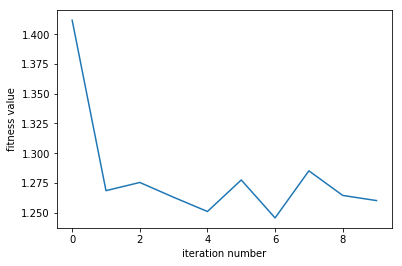

In [25]:
plt.plot(list(range(10)),sda1_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

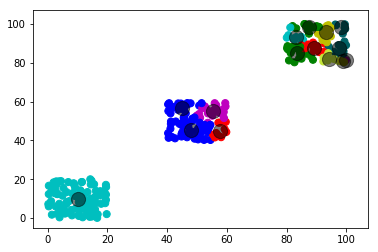

In [28]:
plt.scatter(sda1[:, 0], sda1[:, 1],c=colorMapGenerator(sda1_response[1].r,sda1), s=50, cmap='viridis')
centers = np.array([pattern.centroid for pattern in sda1_response[1].r])
plt.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=0.5);

### Running KMQGA on second simulated dataset

In [51]:
sda2 = sda(2, 110)
sda2_response = quantumGeneticAlgorithm(sda2,pop_size,pcc,pc,pm,pmm,n_max,m_max,10)

--------------------generation : 1 ------------------
best fitness : 1.2516441206761053
best chromosome cluster numbers : 19
best chrom fit : 1.2516441206761053
best chrom cluster numbers : 19
--------------------generation : 2 ------------------
best fitness : 1.3162761062949389
best chromosome cluster numbers : 19
best chrom fit : 1.3162761062949389
best chrom cluster numbers : 19
--------------------generation : 3 ------------------
best fitness : 1.3107719640476594
best chromosome cluster numbers : 19
best chrom fit : 1.3162761062949389
best chrom cluster numbers : 19
--------------------generation : 4 ------------------
best fitness : 1.2786002674809802
best chromosome cluster numbers : 19
best chrom fit : 1.3162761062949389
best chrom cluster numbers : 19
--------------------generation : 5 ------------------
best fitness : 1.2225409859771483
best chromosome cluster numbers : 19
best chrom fit : 1.3162761062949389
best chrom cluster numbers : 19
--------------------generation : 6 

Text(0.5, 0, 'iteration number')

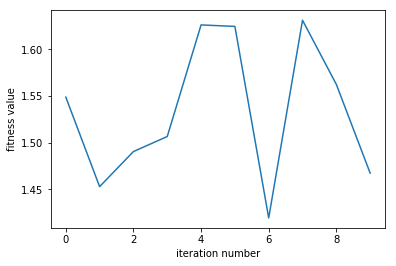

In [39]:
plt.plot(list(range(10)),sda2_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

as u see KMQGA is so non-deterministic and it can't converge to anything slowly , its fitness value quickly changed in every generation.

[[18.00806749 85.84645339]
 [13.43603704 95.93824977]
 [ 9.82979925 85.75917949]
 [89.73834291 90.38069065]
 [49.96911858 49.6786703 ]
 [ 3.07635358 91.84289282]
 [10.27939564  9.73811627]
 [ 3.56245264 82.79423618]]
Closest centroid (10.279395641792243, 9.738116274413361)


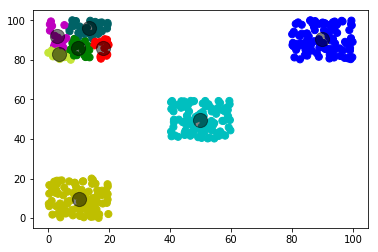

In [46]:
print(centers)
from math import sqrt
euclid = lambda x1, y1, x2, y2: sqrt((x2- x1)**2 + (y2 - y1)**2)
candidate = (12.3, 23.4)
closest = float("inf")
for x2, y2 in centers:
    dist = euclid(candidate[0], candidate[1], x2, y2)
    if dist < closest:
        closest = dist
        ans = (x2, y2)
print("Closest centroid", ans)
plt.scatter(sda2[:, 0], sda2[:, 1],c=colorMapGenerator(sda2_response[1].r,sda2), s=50, cmap='viridis')
centers = np.array([pattern.centroid for pattern in sda2_response[1].r])
plt.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=0.5);

### Running KMQGA on Third simulated dataset

In [ ]:
sda3 = sda(3, 50)
sda3_response = quantumGeneticAlgorithm(sda3,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1])

In [ ]:
plt.plot(list(range(N_max[1])),sda3_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

In [ ]:
plt.scatter(sda3[:, 0], sda3[:, 1],c=colorMapGenerator(sda3_response[1].r,sda3), s=50, cmap='red')
centers = np.array([pattern.centroid for pattern in sda3_response[1].r])
plt.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
iris_dataset = read_df(iris_addr)[:,:-1].astype(float)
iris_response = quantumGeneticAlgorithm(iris_dataset,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1], 3)
plt.plot(list(range(300)),iris_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

In [47]:
blood_dataset = read_df(blood_addr)[:,:-1].astype(float)
blood_response = quantumGeneticAlgorithm(blood_dataset,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1],3)
plt.plot(list(range(300)),blood_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

NameError: name 'blood_addr' is not defined

In [ ]:
wine_dataset = read_df(wine_addr)[:,1:]
# wine_dataset.shape
# X = np.array([[1, 2], [1, 4], [1, 0],
#                [4, 2], [4, 4], [4, 0]])
# kmeans = KMeans(n_clusters=3,init=np.array([wine_dataset[1],wine_dataset[10],wine_dataset[80]]),n_init=1).fit(wine_dataset)
# kmeans.cluster_centers_
wine_response = quantumGeneticAlgorithm(wine_dataset,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1])

In [ ]:
wine_dataset = read_df(wine_addr)[:,1:]
wine_dataset.shape
# X = np.array([[1, 2], [1, 4], [1, 0],
#                [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=3,init=np.array([wine_dataset[1],wine_dataset[10],wine_dataset[80]]),n_init=1).fit(wine_dataset)


In [ ]:
centers = np.array([pattern.centroid for pattern in wine_response[1].r])
centers.shape

In [ ]:
plt.plot(list(range(N_max[1])),wine_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

In [ ]:
glass_dataset = read_df(glass_addr)
glass_dataset
# glass_response = quantumGeneticAlgorithm(glass_dataset,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1],2)

In [ ]:
centers = np.array([pattern.centroid for pattern in glass_response[1].r])
centers.shape

In [ ]:
plt.plot(list(range(N_max[1])),glass_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

In [ ]:
spectf_dataset = read_df(spectf_train)[:,1:]
spectf_response = quantumGeneticAlgorithm(spectf_dataset,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1],2)

In [ ]:
def three_point_bruteforce(dataset) :
    bestFit = float('-inf')
    bestI = 0
    bestJ = 1
    bestZ = 2
    for first in range(dataset.shape[0]) :
        for second in range(first,dataset.shape[0]) :
            if equality(dataset[first],dataset[second]) :
                continue
            for third in range(second,dataset.shape[0]) :

                if equality(dataset[first],dataset[third]) :
                    continue
                if equality(dataset[second],dataset[third]) :
                    continue
                fitness = calFitThird(dataset,first,second,third)
                if fitness > bestFit :
                    bestFit = fitness
                    bestI = first
                    bestJ = second  
                    bestZ = third
                if((first + second + third) % 300 == 0) :
                    print(bestFit)
    print('------------------------------------')
    print(bestFit)
    return bestFit,bestI,bestJ,bestZ


def calFitThird(dataset,first,second,third) :
    clusterMembers = np.array([None,None,None])
    for i,pattern in enumerate(clusterMembers) :
        clusterMembers[i] = np.array([]).astype(int)
    for i,data in enumerate(dataset):
        minDist = float('inf')
        minCentroidIndex = -1
        for j,centroid in enumerate([first,second,third]) :
            dist = ToolBox.euclideanDistance(dataset[i],dataset[centroid]) 
            if dist < minDist :
                minCentroidIndex = j
                minDist = dist
        clusterMembers[minCentroidIndex] = np.append(clusterMembers[minCentroidIndex],i)
    "Calculate each centroid point via mean of every cluster member"
    centroids = np.array([None,None,None])
    for i,cm in enumerate(clusterMembers):
        # calculating centroid for every cluster
        if len(cm) == 0 :       
            print(cm)
        centroids[i] = np.mean(dataset[cm],axis=0)
    
    s = [np.mean([ToolBox.euclideanDistance(pattern, member) \
      for member in dataset[clusterMembers[i]]]) for i,pattern in enumerate(centroids)]
    fitness = 1/np.mean([np.max([(s[i] + s[j])/ToolBox.euclideanDistance(pattern,pattern2) \
                    for j,pattern2 in enumerate(centroids) if i != j]) for i,pattern in enumerate(centroids)])
    return fitness

def two_point_bruteforce(dataset) : 
    bestFit = float('-inf')
    bestI = 0
    bestJ = 1
    for first in range(dataset.shape[0]) :
        for second in range(first,dataset.shape[0]) :
            if equality(dataset[first],dataset[second]) :
                continue
            fitness = calFit_2(dataset,first,second)
            if fitness > bestFit :
                bestFit = fitness
                bestI = first
                bestJ = second  
            if((first + second) % 100 == 0) :
                print(bestFit)
    return bestFit,bestI,bestJ
    
def calFit(dataset,first,second) :
    kmeans = KMeans(n_clusters=2,init=np.array([dataset[pattern] for pattern in [first,second]]),n_init=1).fit(dataset)
    clusterMembers = np.array([None,None])
    for i,pattern in enumerate(clusterMembers) :
        clusterMembers[i] = np.array([]).astype(int)
    for i,label in enumerate(kmeans.labels_) :
        clusterMembers[label] = np.append(clusterMembers[label],i)
    
    "Calculate each centroid point via mean of every cluster member"
    centroids = np.array([None,None])
    for i,cm in enumerate(clusterMembers):
        # calculating centroid for every cluster
        if len(cm) == 0 :       
            print(cm)
        centroids[i] = np.mean(dataset[cm],axis=0)
    
    s = [np.mean([ToolBox.euclideanDistance(pattern, member) \
      for member in dataset[clusterMembers[i]]]) for i,pattern in enumerate(centroids)]
    fitness = 1/np.mean([np.max([(s[i] + s[j])/ToolBox.euclideanDistance(pattern,pattern2) \
                    for j,pattern2 in enumerate(centroids) if i != j]) for i,pattern in enumerate(centroids)])
    return fitness

def calFit_2(dataset,first,second) :
#     kmeans = KMeans(n_clusters=2,init=np.array([dataset[pattern] for pattern in [first,second]]),n_init=1).fit(dataset)
    clusterMembers = np.array([None,None])
    for i,pattern in enumerate(clusterMembers) :
        clusterMembers[i] = np.array([]).astype(int)
    for i,data in enumerate(dataset):
        minDist = float('inf')
        minCentroidIndex = -1
        for j,centroid in enumerate([first,second]) :
            dist = ToolBox.euclideanDistance(dataset[i],dataset[centroid]) 
            if dist < minDist :
                minCentroidIndex = j
                minDist = dist
        clusterMembers[minCentroidIndex] = np.append(clusterMembers[minCentroidIndex],i)
#     print(clusterMembers)
    "Calculate each centroid point via mean of every cluster member"
    centroids = np.array([None,None])
    for i,cm in enumerate(clusterMembers):
        # calculating centroid for every cluster
        if len(cm) == 0 :       
            print(cm)
        centroids[i] = np.mean(dataset[cm],axis=0)
    
    s = [np.mean([ToolBox.euclideanDistance(pattern, member) \
      for member in dataset[clusterMembers[i]]]) for i,pattern in enumerate(centroids)]
    fitness = 1/np.mean([np.max([(s[i] + s[j])/ToolBox.euclideanDistance(pattern,pattern2) \
                    for j,pattern2 in enumerate(centroids) if i != j]) for i,pattern in enumerate(centroids)])
    return fitness

def equality(firstDp,secondDp) :
    if (len(firstDp) != len(secondDp)) :
        print("Error Length of array ")
        return None
    for i in range(len(firstDp)) :
        if firstDp[i] != secondDp[i] :
            return False
    return True


In [ ]:
spectf_dataset = read_df(spectf_train)[:,1:]
# fitness,bestI,bestJ = two_point_bruteforce(spectf_dataset)
spectf_dataset.shape

In [ ]:
wine_dataset = read_df(wine_addr)[:,1:]
fitness,bestI,bestJ,bestZ = three_point_bruteforce(np.array(minmax(pd.DataFrame(wine_dataset))))
wine_dataset.shape

In [ ]:
iris_dataset = read_df(iris_addr)[:,:-1].astype(float)
fitness,bestI,bestJ,bestZ = three_point_bruteforce(np.array(minmax(pd.DataFrame(read_df(iris_addr)[:,:-1]))))
iris_dataset.shapeb

In [ ]:
glass_dataset = read_df(glass_addr)[:,1:-1]
fitness,bestI,bestJ = two_point_bruteforce(np.array(minmax(pd.DataFrame(glass_dataset))))


In [ ]:
print(fitness)

In [ ]:
glass_dataset = read_df(glass_addr)[:,1:]
fitness,bestI,bestJ = two_point_bruteforce(np.array(minmax(pd.DataFrame(glass_dataset))))